<a href="https://colab.research.google.com/github/HwangHanJae/datascience-learningnote-titanic/blob/main/titanic_transcriptions2_csv_multiple_algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#라이브러리 로드 & 기본환경설정

In [1]:
#라이브러리 로드
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats

In [2]:
#시각화를 위한 테마 설정
plt.style.use('ggplot')
#그래프를 선명하게
set_matplotlib_formats('svg')

#데이터 가져오기 & 미리보기


In [3]:
train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DataScience/My CSV/titanic_transcription2_train_df.csv")
test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DataScience/My CSV/titanic_transcription2_test_df.csv")

In [4]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Pclass
0,0,3,0,1,0,0,1,0,3
1,1,1,1,2,3,1,3,0,2
2,1,3,1,1,1,0,2,1,3
3,1,1,1,2,3,0,3,0,2
4,0,3,0,2,1,0,1,1,6


In [5]:
test.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Pclass
0,892,3,0,2,0,2,1,1,6
1,893,3,1,2,0,0,3,0,6
2,894,2,0,3,1,2,1,1,6
3,895,3,0,1,1,0,1,1,3
4,896,3,1,1,1,0,3,0,3


#머신러닝

##훈련, 예측 데이터 준비

In [6]:
X_train = train.drop(['Survived'],axis=1)
y_train = train['Survived']
X_test = test.drop(['PassengerId'], axis=1)

In [7]:
print(X_train.shape)
X_train.head()

(891, 8)


,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Pclass
0,3,0,1,0,0,1,0,3
1,1,1,2,3,1,3,0,2
2,3,1,1,1,0,2,1,3
3,1,1,2,3,0,3,0,2
4,3,0,2,1,0,1,1,6


In [8]:
print(y_train.shape)

(891,)


In [9]:
print(X_test.shape)
X_test.head()

(418, 8)


,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Pclass
0,3,0,2,0,2,1,1,6
1,3,1,2,0,0,3,0,6
2,2,0,3,1,2,1,1,6
3,3,0,1,1,0,1,1,3
4,3,1,1,1,0,3,0,3


##훈련 및 하이퍼 파라미터 튜닝

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
estimators = [DecisionTreeClassifier(random_state=42),
              RandomForestClassifier(random_state=42),
              GradientBoostingClassifier(random_state=42)]
estimators

[DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=42, splitter='best'),
 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                        criterion='gini', max_depth=None, max_features='auto',
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, n_estimators=100,
                        n_jobs=None, oob_score=False, random_state=42, verbose=0,
                        warm_start=False),
 GradientBoost

In [11]:
from sklearn.model_selection import GridSearchCV
max_depth = np.arange(1,10,1)
max_features = np.arange(0.1, 1.0, 0.1)
max_leaf_nodes = np.arange(1,10,1)

results = []
for estimator in estimators:
  result = []
  param_grid = {"max_depth" : max_depth,
                "max_features" : max_features,
                "max_leaf_nodes" : max_leaf_nodes
                }
                
  grid = GridSearchCV(estimator, param_grid, scoring='accuracy', n_jobs=-1,cv=5,verbose=2)
  grid.fit(X_train,y_train)
  result.append(estimator.__class__.__name__)
  result.append(grid.best_estimator_)
  result.append(grid.best_params_)
  result.append(grid.best_score_)
  results.append(result)

Fitting 5 folds for each of 729 candidates, totalling 3645 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 3626 tasks      | elapsed:   12.2s
[Parallel(n_jobs=-1)]: Done 3642 out of 3645 | elapsed:   12.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 3645 out of 3645 | elapsed:   12.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 729 candidates, totalling 3645 fits


[Parallel(n_jobs=-1)]: Done  70 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done 312 tasks      | elapsed:   35.0s
[Parallel(n_jobs=-1)]: Done 718 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 1284 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 2014 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 2904 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 3642 out of 3645 | elapsed:  7.0min remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 3645 out of 3645 | elapsed:  7.0min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 729 candidates, totalling 3645 fits


[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 604 tasks      | elapsed:   24.9s
[Parallel(n_jobs=-1)]: Done 1416 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 2548 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 3645 out of 3645 | elapsed:  3.1min finished


In [12]:
results_df = pd.DataFrame(results)
results_df.columns = ['estimator', 'best_estimator', 'best_param', 'best_score']
results_df

,estimator,best_estimator,best_param,best_score
0,DecisionTreeClassifier,"DecisionTreeClassifier(ccp_alpha=0.0, class_we...","{'max_depth': 4, 'max_features': 0.9, 'max_lea...",0.824914
1,RandomForestClassifier,"(DecisionTreeClassifier(ccp_alpha=0.0, class_w...","{'max_depth': 3, 'max_features': 0.8, 'max_lea...",0.820426
2,GradientBoostingClassifier,"([DecisionTreeRegressor(ccp_alpha=0.0, criteri...","{'max_depth': 2, 'max_features': 0.5, 'max_lea...",0.819321


In [13]:
best_estimator = results_df.loc[0]['best_estimator']

In [14]:
print(best_estimator.feature_importances_)

[0.20347359 0.04836761 0.         0.         0.03794748 0.66023756
 0.         0.04997376]


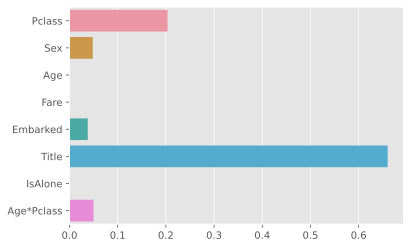

In [15]:
sns.barplot(x=best_estimator.feature_importances_, y=X_train.columns)

In [16]:
y_pred = best_estimator.predict(X_test)

In [17]:
submit = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DataScience/Data/titanic/gender_submission.csv')
submit

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [18]:
submit['Survived'] = y_pred

In [19]:
(submit['Survived'] != y_pred).sum()

0

In [20]:
submit

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [21]:
submit.to_csv("/content/drive/MyDrive/Colab Notebooks/DataScience/My CSV/titanic_transcription2_my_model_submit.csv", index=False)

In [22]:
result = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DataScience/My CSV/titanic_transcription2_my_model_submit.csv')
result

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
